### Group:Yan Xu, FuHua Song, Yuwei Deng


# Introduction

## What question are you answering with your project?

I hope to use this county based cancer information set to discuss which factors at the socio-economic level will affect cancer mortality.

Of course, this is only a cross-sectional data. It is difficult for us to see the changes of these factors over time, and too many covariates also make it difficult for us to achieve the balance between covariates, so as to estimate the causal effect of individual variables. Therefore, I do not intend to make causal inference here.


More is correlation analysis, trying to find some variables that we are not used to, but have an impact on cancer mortality

## Why should we care about this question?

First of all, if we look at it from a human point of view, cancer is very important. In recent years, the incidence of cancer and the social and economic burden of cancer have gradually increased, and the importance of cancer as a topic has increased significantly.

Secondly, the onset of cancer and the death from cancer are now increasingly two separate things, especially with the advances in medical treatment. Even if they do, a significant proportion of cancers are currently curable if they have good health insurance or are financially sound. So, socioeconomic factors have an impact on cancer mortality, and they have a significant impact, both indirectly through socioeconomic factors that influence individual behavioral factors (some of which may lead to cancer) and directly, mainly on patients' ability and resources to access treatment. So I wanted to look at what socioeconomic factors are important for cancer mortality, and obviously, it's very important.

## A brief literature review

Studies have shown that social inequality in cancer persists and changes over time [1]. Some scholars based on geographical coding and use based on the regional social and economic measures, using different single variable and comprehensive regional social and economic measures, to investigate their relationship with the cancer mortality, the results show that the measurement methods including economic poverty data is the most powerful, can be detected only measure cannot be observed by education and wealth gradient [2]; Poor people and those in rural areas have higher cancer deaths than wealthier people and urban residents, and are at higher risk of lung, colorectal, prostate and cervical cancer. Socioeconomic inequality exists for both whites and blacks, and in every deprivation group, blacks have a higher death rate from every type of cancer than whites. Differences in mortality rates may reflect inequalities in smoking and other cancer risk factors, screening and treatment. [3] and for different types of cancer and the relationship between socioeconomic status and research, and the incidence of cancer mortality in the United States in 1950-2014 / social and economic and racial and ethnic differences, education and income inequality for increased death rates for all cancers have a positive impact, in poor communities and ethnic groups, The survival rate of cancer patients is significantly lower [4].

［１］Singh GK, Miller BA, Hankey BF, Edwards BK. Area Socioeconomic Variations in U.S. Cancer Incidence,Mortality, Stage, Treatment, and Survival, 1975–1999. NCI Cancer Surveillance Monograph Series,Number 4. Bethesda, MD: National Cancer Institute, 2003. NIH Publication No. 03-0000. 

［２］Krieger, N., Chen, J. T., Waterman, P. D., Soobader, M. J., & Subramanian, S. V. (2002). Carson: Geocoding and monitoring of US socioeconomic inequalities in mortality and cancer incidence: does the choice of area-based measure and geographic level matter. The Public Health Disparities Geocoding Project. Am J Epidemiol, 156, 471-482.

［３］Singh, G. K., Williams, S. D., Siahpush, M., & Mulhollen, A. (2011). Socioeconomic, rural-urban, and racial inequalities in US cancer mortality: part I—all cancers and lung cancer and part II—colorectal, prostate, breast, and cervical cancers. Journal of cancer epidemiology, 2011.

［４］Singh, G. K., & Jemal, A. (2017). Socioeconomic and racial/ethnic disparities in cancer mortality, incidence, and survival in the United States, 1950–2014: over six decades of changing patterns and widening inequalities. Journal of environmental and public health, 2017.

# Data

In [2]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import time

C:\Users\1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Describe the source(s) of the data

"These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. Most of the data preparation process can be veiwed here."

source:https://data.world/nrippner/ols-regression-challenge.

The original purpose of providing this data set was to construct a multivariate regression to predict the incidence of cancer. I'm not so concerned with prediction, but rather to study what factors contribute to cancer mortality, which is, of course, two sides of the same coin. Let me list the dictionary of the data and then explore the data.

Data Dictionary：

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates



Here we import the data and conduct basic analysis of the data.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb

pcancer = "./data/cancer_reg.csv"
df = pd.read_csv(pcancer)

df.head()

,TARGET_deathRate,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,164.9,1397.0,469,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,161.3,173.0,70,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,174.7,102.0,50,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,194.8,427.0,202,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,144.4,57.0,26,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
# Check the data profile.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET_deathRate         3047 non-null   float64
 1   avgAnnCount              3047 non-null   float64
 2   avgDeathsPerYear         3047 non-null   int64  
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
# check for null values
for col in df.columns:
    print((col, sum(df[col].isnull())))

('TARGET_deathRate', 0)
('avgAnnCount', 0)
('avgDeathsPerYear', 0)
('incidenceRate', 0)
('medIncome', 0)
('popEst2015', 0)
('povertyPercent', 0)
('studyPerCap', 0)
('binnedInc', 0)
('MedianAge', 0)
('MedianAgeMale', 0)
('MedianAgeFemale', 0)
('Geography', 0)
('AvgHouseholdSize', 0)
('PercentMarried', 0)
('PctNoHS18_24', 0)
('PctHS18_24', 0)
('PctSomeCol18_24', 2285)
('PctBachDeg18_24', 0)
('PctHS25_Over', 0)
('PctBachDeg25_Over', 0)
('PctEmployed16_Over', 152)
('PctUnemployed16_Over', 0)
('PctPrivateCoverage', 0)
('PctPrivateCoverageAlone', 609)
('PctEmpPrivCoverage', 0)
('PctPublicCoverage', 0)
('PctPublicCoverageAlone', 0)
('PctWhite', 0)
('PctBlack', 0)
('PctAsian', 0)
('PctOtherRace', 0)
('PctMarriedHouseholds', 0)
('BirthRate', 0)


'PctSomeCol18_24' has more missing values.

Noting that it was completely correlated with the other three 18-24 year old educational variables, it was removed.

In [7]:
df.drop(
    columns=[
        'PctSomeCol18_24' ],
    inplace=True)

In [8]:
df.describe()

,TARGET_deathRate,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,178.664063,606.338544,185.965868,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,27.751511,1416.356223,504.134286,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,59.700000,6.000000,3.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,161.200000,76.000000,28.000000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,178.100000,171.000000,61.000000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,195.200000,518.000000,149.000000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,362.800000,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


There are a total of 34 columns of data, among which the data structure of two columns is Object. We deleted another column of missing value data that is completely collinear.

Let's move on to the next step of data processing.

## Discuss whether you are removing any outliers from your data, or doing any other sampling restrictions

We have carried out basic data description in 2.1, and here we begin to further explore the data. 

The main thing is to remove some irrelevant variables and completely collinear variables.

In [9]:
# Check collinearity of major variables
import pandas as pd
import os
from scipy import stats
import itertools

df_coll = df.loc[:, "avgAnnCount":"incidenceRate"]

for t1, t2 in itertools.combinations(df_coll.columns, 2) :
    print(t1, t2, stats.pearsonr(df_coll[t1], df_coll[t2]))

avgAnnCount avgDeathsPerYear (0.9394077833002424, 0.0)
avgAnnCount incidenceRate (0.07355317474092074, 4.824956421274341e-05)
avgDeathsPerYear incidenceRate (0.06268985661901177, 0.0005352945805501572)


According to the dictionary of the data download source, I guessed that "TARGET_deathRate" and "avgDeathsPerYear" are the same thing, which should be statistically positive and highly correlated, but the actual result is not so. 

For now, we cannot delete these columns of data rashly.

As for the proportion of county residents divided by race, it is obvious that there is complete multicollinearity. Here we keep white, black and Asian, and delete other.  
 
I'm going to delete the county names,  


In [10]:
stats.pearsonr(df['TARGET_deathRate'],df['PercentMarried'])

(-0.2668204635535114, 7.915546145134413e-51)

In [11]:
stats.pearsonr(df['TARGET_deathRate'],df['PctMarriedHouseholds'])

(-0.29332534051013265, 1.596181606195986e-61)

 There are two columns of marriage data: "PercentMarried" and "PctMarriedHouseholds," and we only keep one, and we decide which one to keep based on the correlation with the predicted value.  

In [12]:
df['binnedInc']

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3042      (45201, 48021.6]
3043    (48021.6, 51046.4]
3044    (51046.4, 54545.6]
3045    (48021.6, 51046.4]
3046    (40362.7, 42724.4]
Name: binnedInc, Length: 3047, dtype: object

Another data of object type is "binnedInc". As shown in the previous cell, it is Median income per capita binned by Decile. The data form is an interval of left open and right closed.

Because we already have 'medianIncome', and the data type is number, easy to operate.

Here, I attempt to transform the data of the interval, that is, the interval data form into the interval length, which is used to explain the income distribution and further explain the target variable. However, since there is no overall income distribution data, it is very far-fetched to only use a median income range, so we leave it at that, and need to obtain further income distribution data to improve the analysis. So I'm going to delete "binnedInc" as well.

In [13]:
df.drop(
    columns=[
        'PercentMarried','Geography','binnedInc','PctOtherRace' ],
    inplace=True)

So let's talk about outliers.

min 59.7 max 362.8


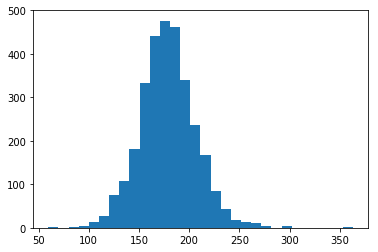

In [29]:
# Histogram to see TARGET_deathRate
mhist=df['TARGET_deathRate'].values
print("min", mhist.min(), "max", mhist.max())
plt.hist(mhist, bins=30)
plt.show()

It can be seen that the mortality data are mainly concentrated between [100,250], basically in line with normal distribution, without particularly large outliers, so deletion is not necessary here.

## Discuss whether you are transforming the data and/or merging/appending multiple datasets together



At present, there is no need for special transformation of data.One of the more important reasons for the lack of manipulation is that the data set we are working with basically covers the major socioeconomic variables.

If there is any relevant operation in the future analysis, it will be specially indicated.

For example, in PCA, we bounded new variables composed of colinear variables with other variables.

## Show comprehensive summary statistics.
    ■ Remember: summary statistics are a very important part of all applied work!

min 59.7 max 362.8


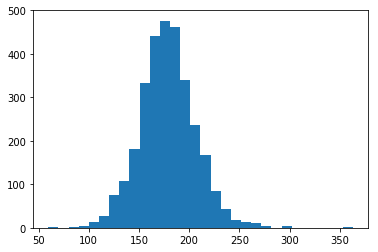

In [28]:
# Histogram to see TARGET_deathRate
mhist=df['TARGET_deathRate'].values
print("min", mhist.min(), "max", mhist.max())
plt.hist(mhist, bins=30)
plt.show()

C:\Users\1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


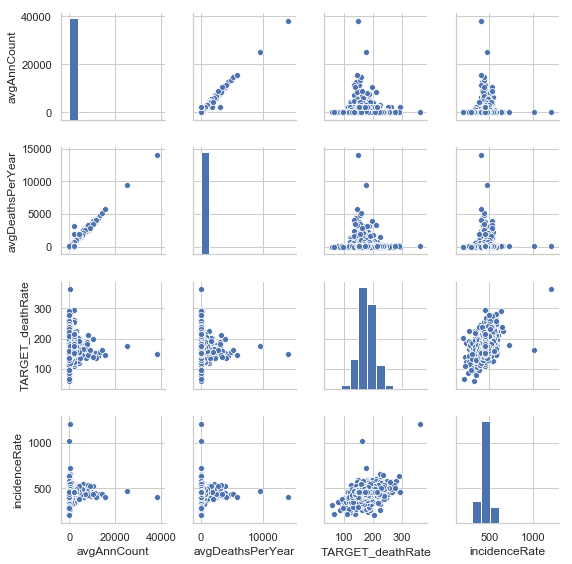

In [245]:
# scatterplots (hat tip Sebastian Raschka from his book "Python Machine Learning")

sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate']], size=2)
plt.show()

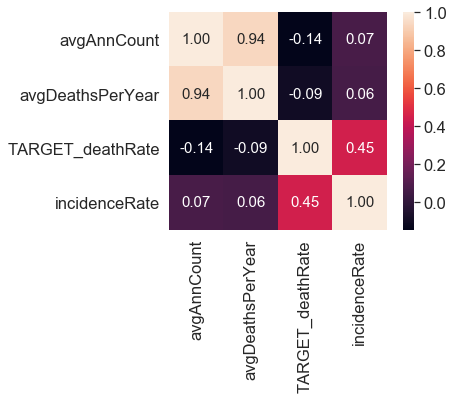

In [246]:
cols = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate']
cm = np.corrcoef(df[['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate']].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

Now let's look at the correlation between health insurance.

C:\Users\1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


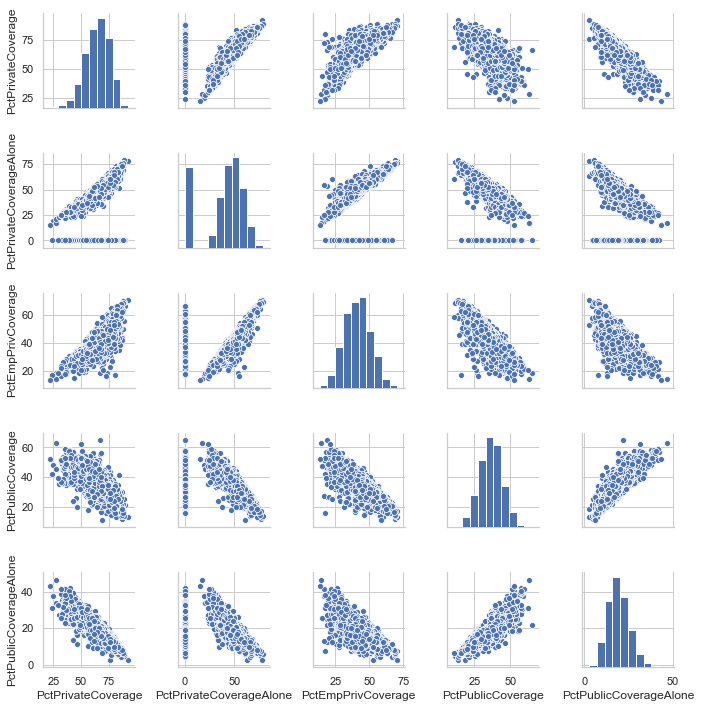

In [247]:
cols = ['PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
                'PctPublicCoverageAlone']
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[cols], size=2)
plt.show()

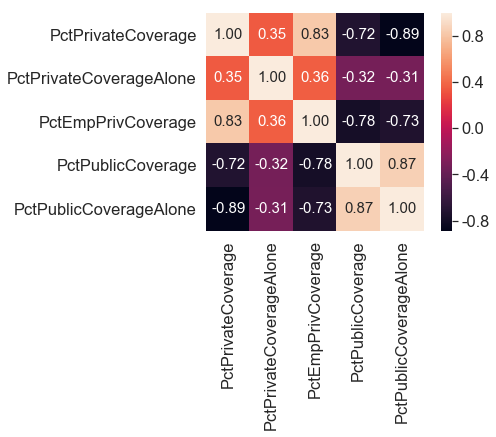

In [248]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

There are a couple pairs of fairly strongly correlated features: (PctPrivateCoverage & PctPublicCoverageAlone) and (avgAnnCount & avgDeathsPerYear). 

We'll keep them in mind as we observe how they work in the linear regression.

#### Summary

This data is a patchwork of several publicly available statistics, mainly geocoded (county) cross-sectional data describing socioeconomic levels and cancer incidence and mortality, not a time series or panel. So the information we can get from this may be relatively limited, which is a defect of the data set in this paper; Another defect is the lack of distribution of some core variables within the county.


In terms of mortality data distribution, it basically conforms to normal distribution without special outliers.

The data integrity is good. The variables with more missing values also happen to be completely collinear with other education variables. The deletion does not affect the analysis, and the data quality is good on the whole.

A more serious problem may be the correlation between data variables, which we have made a preliminary analysis, and further analysis will be carried out in the model.

# Modeling

Analyze the data using 2-3 different model specifications (i.e. with/without covariates,using different definitions of the treatment, outcome, or predictor variables, etc.)
■ Remember: complicated models are not necessarily better than simple models.
There is nothing wrong with OLS regression if that’s the best model.

## OLS

In [39]:
print(df.columns.values)

['avgAnnCount' 'avgDeathsPerYear' 'TARGET_deathRate' 'incidenceRate'
 'medIncome' 'popEst2015' 'povertyPercent' 'studyPerCap' 'MedianAge'
 'MedianAgeMale' 'MedianAgeFemale' 'AvgHouseholdSize' 'PctNoHS18_24'
 'PctHS18_24' 'PctBachDeg18_24' 'PctHS25_Over' 'PctBachDeg25_Over'
 'PctEmployed16_Over' 'PctUnemployed16_Over' 'PctPrivateCoverage'
 'PctPrivateCoverageAlone' 'PctEmpPrivCoverage' 'PctPublicCoverage'
 'PctPublicCoverageAlone' 'PctWhite' 'PctBlack' 'PctAsian'
 'PctMarriedHouseholds' 'BirthRate']


In [44]:
import pandas as pd
import statsmodels.api as sm


df[np.isnan(df)] = 0
df[np.isinf(df)] = 0

x = df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
 'medIncome' ,'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24',
 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
 'PctPrivateCoverageAlone' ,'PctEmpPrivCoverage', 'PctPublicCoverage',
 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
 'PctMarriedHouseholds', 'BirthRate']].values
x = sm.add_constant(x)
y = df["TARGET_deathRate"].values
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     109.6
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:16:29   Log-Likelihood:                -13380.
No. Observations:                3047   AIC:                         2.682e+04
Df Residuals:                    3018   BIC:                         2.699e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.2350     12.764      8.480      0.000      83.208     133.262
x1            -0.0032      0.001     -4.100      0.000      -0.005      -0.002
x2             0.0176      0.004      4.467      0.000       0.010       0.025
x3             0.2011      0.007     27.611      0.000       0.187       0.215
x4          2.498e-05   8.05e-05      0.310      0.756      -0.000       0.000
x5         -1.702e-05   5.55e-06     -3.068      0.002   -2.79e-05   -6.14e-06
x6             0.4860      0.152      3.205      0.001       0.189       0.783
x7            -0.0001      0.001     -0.191      0.849      -0.001       0.001
x8            -0.0033      0.008     -0.417      0.677      -0.019       0.012
x9            -0.1392      0.206     -0.677      0.499      -0.542       0.264
x10           -0.0353      0.218     -0.162      0.871      -0.463       0.392
x11           -0.5747      0.962     -0.598      0.550      -2.460       1.311
x12           -0.1407      0.057     -2.478      0.013      -0.252      -0.029
x13            0.2511      0.050      5.041      0.000       0.153       0.349
x14           -0.0761      0.110     -0.695      0.487      -0.291       0.139
x15            0.5294      0.094      5.607      0.000       0.344       0.714
x16           -1.0069      0.152     -6.610      0.000      -1.306      -0.708
x17           -0.0295      0.028     -1.043      0.297      -0.085       0.026
x18            0.3335      0.161      2.075      0.038       0.018       0.649
x19           -0.4012      0.133     -3.015      0.003      -0.662      -0.140
x20           -0.0057      0.018     -0.319      0.750      -0.041       0.030
x21            0.2163      0.104      2.082      0.037       0.013       0.420
x22           -0.0681      0.221     -0.308      0.758      -0.501       0.365
x23            0.1504      0.278      0.540      0.589      -0.395       0.696
x24            0.0182      0.056      0.326      0.744      -0.091       0.128
x25            0.0514      0.054      0.949      0.343      -0.055       0.157
x26            0.0882      0.191      0.462      0.644      -0.286       0.462
x27           -0.2724      0.092     -2.945      0.003      -0.454      -0.091
x28           -0.6056      0.192     -3.152      0.002      -0.982      -0.229
==============================================================================
Omnibus:                      194.866   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.098
Skew:                           0.156   Prob(JB):                    1.82e-174
Kurtosis:                       5.491   Cond. No.                     1.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

After fitting an ordinary least squares model with the ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate','medIncome' ,'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24','PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone' ,'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
 'PctMarriedHouseholds', 'BirthRate'] regressed on the 'TARGET_deathRate', we have a pretty well-performing model, as evidenced by the Adjusted R^2 (109).

Let's treat this as our baseline, and apply model diagnostics and feature selection to try to improve it.

We will attempt to account for multicollinearity, heteroscedsticity of residuals, and normality of distributions of residuals.

Multicollinearity
Let's apply variance inflation factors to assess for multicollinearity. VIFs, by performing an independent variable on the design matrix comprising all the other independent variables, allows us to assess the degree to which that independent variable is orthogonal the others. Larger VIFs indicate multicollinearity.
(!)note: VIF values exceeding 10 are commonly interpreted as "high" in multicollinearity. However, this threshold is arbitrary, and it may make sense to select a different threshold in many cases.

### VIF

In [206]:
X = df.loc[:,['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
 'medIncome' ,'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24',
 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
 'PctPrivateCoverageAlone' ,'PctEmpPrivCoverage', 'PctPublicCoverage',
 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
 'PctMarriedHouseholds', 'BirthRate']]

In [207]:
vif = pd.DataFrame([[var, variance_inflation_factor(X.values, X.columns.get_loc(var))] for var in X.columns],
                   index=range(X.shape[1]), columns=['Variable', 'VIF'])
vif

,Variable,VIF
0,avgAnnCount,11.406332
1,avgDeathsPerYear,35.405942
2,incidenceRate,83.858827
3,medIncome,117.214811
4,popEst2015,28.883402
5,povertyPercent,42.943161
6,studyPerCap,1.136855
7,MedianAge,2.046683
8,MedianAgeMale,530.273333
9,MedianAgeFemale,672.793854


The variables with multicollinearity will be retained, which will be merged into one variable through PCA later, and then combined with other variables for regression.

So here's a temporary deposit.

In [212]:
mult = vif.loc[((vif['VIF']>=10))].copy()

print(mult['Variable'].values)

['avgAnnCount' 'avgDeathsPerYear' 'incidenceRate' 'medIncome' 'popEst2015'
 'povertyPercent' 'MedianAgeMale' 'MedianAgeFemale' 'AvgHouseholdSize'
 'PctHS18_24' 'PctHS25_Over' 'PctBachDeg25_Over' 'PctEmployed16_Over'
 'PctUnemployed16_Over' 'PctPrivateCoverage' 'PctEmpPrivCoverage'
 'PctPublicCoverage' 'PctPublicCoverageAlone' 'PctWhite'
 'PctMarriedHouseholds' 'BirthRate']


Filter out VIF greater than 10.

In [65]:
vif = vif.loc[~((vif['VIF']>=10))].copy()
vif

,Variable,VIF
6,studyPerCap,1.136855
7,MedianAge,2.046683
11,PctNoHS18_24,9.570584
13,PctBachDeg18_24,5.544747
19,PctPrivateCoverageAlone,5.043998
24,PctBlack,6.634573
25,PctAsian,2.402471


In [67]:
vif['Variable']

6                 studyPerCap
7                   MedianAge
11               PctNoHS18_24
13            PctBachDeg18_24
19    PctPrivateCoverageAlone
24                   PctBlack
25                   PctAsian
Name: Variable, dtype: object

After iteratively removing the feature associated with the largest VIF and then recalculating VIFs, we result in these independent variables:

In [68]:
vcols = ['studyPerCap', 'MedianAge', 'PctNoHS18_24', 'PctBachDeg18_24',
       'PctPrivateCoverageAlone', 'PctBlack', 'PctAsian']

In [69]:
Xvcols = X[vcols].reset_index(drop=True)
pd.DataFrame([[var, variance_inflation_factor(Xvcols.values, Xvcols.columns.get_loc(var))] for var in vcols],
                   index=range(len(vcols)), columns=['Variable', 'VIF'])

,Variable,VIF
0,studyPerCap,1.088605
1,MedianAge,1.870922
2,PctNoHS18_24,3.093731
3,PctBachDeg18_24,2.833780
4,PctPrivateCoverageAlone,3.464821
5,PctBlack,1.395799
6,PctAsian,1.417766


Let's recompute a linear regression on the reduced set of independent variables.

In [78]:
X['Constant'] = 1
vcols = ['studyPerCap', 'MedianAge', 'PctNoHS18_24', 'PctBachDeg18_24',
       'PctPrivateCoverageAlone', 'PctBlack', 'PctAsian','Constant']
Xvcols = X[vcols].reset_index(drop=True)
lr = sm.OLS(y, Xvcols, hasconst=True)
result = lr.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     79.03
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          1.11e-105
Time:                        18:40:27   Log-Likelihood:                -14194.
No. Observations:                3047   AIC:                         2.840e+04
Df Residuals:                    3039   BIC:                         2.845e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
studyPerCap               7.59e-05      0.001      0.086      0.931      -0.002       0.002
MedianAge                  -0.0003      0.010     -0.034      0.973      -0.020       0.020
PctNoHS18_24               -0.2310      0.063     -3.667      0.000      -0.355      -0.107
PctBachDeg18_24            -1.4723      0.116    -12.641      0.000      -1.701      -1.244
PctPrivateCoverageAlone    -0.0820      0.022     -3.688      0.000      -0.126      -0.038
PctBlack                    0.4557      0.032     14.126      0.000       0.392       0.519
PctAsian                   -1.2311      0.191     -6.457      0.000      -1.605      -0.857
Constant                  192.5166      1.938     99.337      0.000     188.717     196.317
==============================================================================
Omnibus:                      143.113   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.503
Skew:                           0.214   Prob(JB):                     3.56e-86
Kurtosis:                       4.708   Cond. No.                     2.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Obviously, the fitting effect is not good, and some explanatory variables we care about have been screened out, and the method of judging and deleting variables using VIF is not good.  
 
And then we take another approach, principal component analysis.  (PCA)  

### PCA

In [237]:
#  principal component analysis and standardize 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

pca_data1 = df[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015',
 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
 'PctHS18_24' ,'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite',
 'PctMarriedHouseholds', 'BirthRate']].copy()
pca = PCA(n_components=1)
pca_data1 = pd.DataFrame(StandardScaler().fit_transform(pca.fit_transform(pca_data1)))

pca_data1.columns = ['PCA_'+str(i) for i in range(pca_data1.shape[1])]

In [238]:
pca_data = pd.concat([pca_data1,X], axis=1)

In [239]:
pca_data

,PCA_0,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctMarriedHouseholds,BirthRate,Constant
0,0.479052,1397.000000,469,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,52.856076,6.118831,1
1,-0.180409,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,45.372500,4.333096,1
2,-0.247979,102.000000,50,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,54.444868,3.729488,1
3,-0.081391,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,51.021514,4.603841,1
4,-0.280498,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,54.027460,6.796657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.292643,1962.667684,15,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,51.063830,7.773512,1
3043,-0.199069,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,52.007937,8.186470,1
3044,-0.206850,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,55.153949,7.809192,1
3045,-0.233991,1962.667684,52,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,58.484232,7.582938,1


In [240]:
pcols = ['studyPerCap', 'MedianAge', 'PctNoHS18_24', 'PctBachDeg18_24',
       'PctPrivateCoverageAlone', 'PctBlack', 'PctAsian','Constant','PCA_0']
Pcols = pca_data[pcols].reset_index(drop=True)
lr = sm.OLS(y, Pcols, hasconst=True)
result = lr.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     69.73
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          1.38e-105
Time:                        03:26:32   Log-Likelihood:                -14192.
No. Observations:                3047   AIC:                         2.840e+04
Df Residuals:                    3038   BIC:                         2.846e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
studyPerCap                 0.0001      0.001      0.140      0.888      -0.002       0.002
MedianAge                  -0.0005      0.010     -0.045      0.964      -0.021       0.020
PctNoHS18_24               -0.2311      0.063     -3.670      0.000      -0.355      -0.108
PctBachDeg18_24            -1.4471      0.117    -12.360      0.000      -1.677      -1.218
PctPrivateCoverageAlone    -0.0821      0.022     -3.694      0.000      -0.126      -0.039
PctBlack                    0.4613      0.032     14.253      0.000       0.398       0.525
PctAsian                   -1.0585      0.209     -5.065      0.000      -1.468      -0.649
Constant                  192.0966      1.948     98.600      0.000     188.277     195.917
PCA_0                      -1.0622      0.528     -2.013      0.044      -2.097      -0.028
==============================================================================
Omnibus:                      141.506   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.983
Skew:                           0.206   Prob(JB):                     7.62e-86
Kurtosis:                       4.708   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be seen that both methods can solve the problem of multicollinearity, but using PCA to aggregate variables is better than directly eliminating these variables with collinearity.


Now let's think about it differently, and instead of fitting it, let's make a prediction and see what happens.

## Ridge

In [192]:
# ridge regression
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_test_pred))


0.49722401266436794
371.550759735527


## RandomForestRegressor & SVM

The basic idea here is to use random forest for fitting and prediction. 

Then random forest was used for feature selection, and SVR was used for training. Compare the results of the two methods.

### RandomForestRegressor 

Colinearity didn't matter - - -

the RF model was making the splits based on what worked and not necessarily trying to balance features

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [137]:
# Plot regression results

%matplotlib inline
import matplotlib.pyplot as plt

def draw_regressor(X, y, model):
    """
        Draw classification area
    """
    plt.figure(figsize=(8,4))
    
    x = np.linspace(min(X.ravel())*0.9, max(X.ravel())*1.1)
    plt.scatter(X.ravel(), y)
    plt.plot(x, model.predict(x.reshape(-1,1)), color="red")
    plt.show()



In [139]:
# Import data and do preliminary processing
df_data = pd.read_csv("./data/cancer_reg.csv")

df_data.drop(
    columns=[
        'Geography','binnedInc' ],
    inplace=True)
df_data[np.isnan(df_data)] = 0
df_data[np.isinf(df_data)] = 0

In [146]:
X  = df_data.iloc[:, 1:].values
y =  df_data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
feat_labels = df_data.columns[1:]

In [161]:
# Random forest regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_test_pred))


0.556419232784181
349.97379409836066


C:\Users\1\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\1\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

#### Feature selection

In [178]:
# Next, complete the importance assessment for the trained random forest  
# feature_importances_ Can be retrieved about the importance of features  

importances = model.feature_importances_
print("importances：", importances)
x_columns = df_data.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []

for f in range(X_train.shape[1]):
    # For the final need to reverse sort, I think it is a similar decision tree backtracking value, convergence from the leaf
# When it comes to roots, roots are more important than leaves.
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
 
print(x_columns_indices)
print(x_columns.shape[0])
print(indices)

importances： [0.02183166 0.03219623 0.19355369 0.0454974  0.02214182 0.03381713
 0.0057991  0.01424389 0.01135749 0.01235246 0.02276801 0.01432239
 0.01256194 0.02330504 0.00443308 0.01287885 0.03795611 0.21815362
 0.01022959 0.02225572 0.03598507 0.00948665 0.01255106 0.00782165
 0.02574744 0.01513444 0.02539067 0.01720517 0.03346406 0.02438017
 0.02117838]
 1) PctBachDeg25_Over              0.218154
 2) incidenceRate                  0.193554
 3) medIncome                      0.045497
 4) PctHS25_Over                   0.037956
 5) PctPrivateCoverage             0.035985
 6) povertyPercent                 0.033817
 7) PctOtherRace                   0.033464
 8) avgDeathsPerYear               0.032196
 9) PctPublicCoverageAlone         0.025747
10) PctBlack                       0.025391
11) PctMarriedHouseholds           0.024380
12) PctHS18_24                     0.023305
13) AvgHouseholdSize               0.022768
14) PctUnemployed16_Over           0.022256
15) popEst2015         

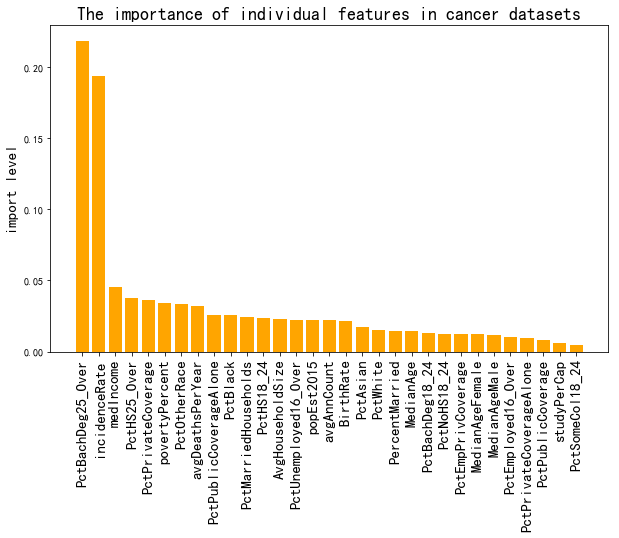

In [244]:

# visualization
 
plt.figure(figsize=(10, 6))
plt.title("The importance of individual features in cancer datasets", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

### SVM

In [172]:
from sklearn.svm import SVR  # Regression algorithm in SVM
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# Data preprocessing to make the data more efficient to be recognized by the model or evaluator
from sklearn import preprocessing
from sklearn.externals import joblib
 
# Import data and do preliminary processing
origin_data = pd.read_csv("./data/cancer_reg.csv")
origin_data.drop(
    columns=[
        'Geography','binnedInc' ],
    inplace=True)
origin_data[np.isnan(df_data)] = 0
origin_data[np.isinf(df_data)] = 0
X = origin_data.iloc[:,1:].values
Y = origin_data.iloc[:,0].values
print(type(Y))

<class 'numpy.ndarray'>


In [186]:
# General characteristics All characteristics in order of importance

all_feature = [17,  2,  3, 16, 20,  5, 28,  1, 24, 26, 29, 13, 10, 19,  4,  0, 30,
       27, 25, 11,  7, 15, 12, 22,  9,  8, 18, 21, 23,  6, 14]


# Here we take the first eight features.
topN_feature = all_feature[:8]

 
# Capture important feature data
data_X = X[:,topN_feature]
 
# Normalize each eigenvalue to a fixed range  
# Standardization of raw data in order to accelerate convergence  
# The min-max normalization transforms the original data linearly to the range [0,1]  
data_X = preprocessing.MinMaxScaler().fit_transform(data_X)
 
# Use train_test_split to separate the training set from the test set
X_train,X_test,y_train,y_test  = train_test_split(data_X,Y,test_size=0.3)
 
# Prediction through multiple models
model_svr1 = SVR(kernel='rbf',C=50,max_iter=10000)
 
 

# fit
model_svr1.fit(X_train,y_train)
 
# score
score = model_svr1.score(X_test,y_test)
print(score)

0.4927636407672429


Obviously, the best prediction effect is random forest. Even though the parameters are optimized, the effect of SVM is not very ideal.

# Findings

## What are your main findings?

#The problem itself  
 

Education is important, and the higher the average level of education, the more likely it is to reduce the death rate from cancer. This may be because education is an important measure of inequality, and as the average level of education rises, we might say that the education gap has narrowed, because the number of years of schooling is capped. On the other hand, the improvement of average education level is also a performance of the improvement of comprehensive quality. Both explanations may be important reasons for the negative relationship between them.

## Are your findings robust to different model specifications?

Yes, the results were robust, especially for PctBachDeg25_Over.

In several kinds of regression fitting, the significance test has been passed. It is also the most important variable in forecasting.

# Conclusion

## Discuss what we’ve learned from your analysis.

#### Technical level

In regression, if there is a strong correlation between independent variables, VIF test is definitely needed. However, after VIF test, it is not a good decision to directly eliminate the variables with VIF > 10. A better method is to change these variables into a variable through principal component analysis, and then carry out regression.

Random forest can overcome the correlation of data itself and has better prediction effect than SVM method after feature selection by RF method.



## Discuss any questions that could be answered in the future.

A more detailed discussion of regional income disparities. The data in this paper are mainly based on county data as a whole, only median income. 

The relationship between regional income distribution and cancer mortality remains to be discussed.
